# Preprocessing

## Checking the data

### Imports

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import sys
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import xgboost
import plotly.express as px
import plotly.graph_objects as go

from numpy import absolute
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from xgboost import XGBRegressor
from sklearn.feature_selection import VarianceThreshold
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler


from immo_eliza.preprocessing import *
from immo_eliza.model import *

### Data upload

In [15]:
df = import_df(False)
df.head()

,property_ID,locality_name,postal_code,price,type_of_property,subtype_of_property,type_of_sale,nr_or_rooms,living_area,equiped_kitchen,furnished,open_fire,terrace,garden,nr_of_facades,swimming_pool,state_of_building
0,1838035,De Panne,8660.0,52934.0,house,appartement,Vaste prijs,1.0,50.0,1.0,1.0,NaN,NaN,NaN,4.0,1.0,NaN
1,1838036,De Panne,8660.0,51000.0,house,appartement,Vaste prijs,1.0,50.0,1.0,1.0,NaN,NaN,NaN,4.0,1.0,NaN
2,1838641,De Panne,8660.0,73000.0,house,appartement,Vaste prijs,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uitstekende staat
3,1838642,De Panne,8660.0,69000.0,house,appartement,Vaste prijs,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goed
4,1839112,De Panne,8660.0,57000.0,house,appartement,Vaste prijs,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,1.0,Uitstekende staat


### Check columns

In [16]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_ID          19925 non-null  int64  
 1   locality_name        19705 non-null  object 
 2   postal_code          19705 non-null  float64
 3   price                2454 non-null   float64
 4   type_of_property     19925 non-null  object 
 5   subtype_of_property  19925 non-null  object 
 6   type_of_sale         19925 non-null  object 
 7   nr_or_rooms          19261 non-null  float64
 8   living_area          17629 non-null  float64
 9   equiped_kitchen      9913 non-null   float64
 10  furnished            8675 non-null   float64
 11  open_fire            657 non-null    float64
 12  terrace              6376 non-null   float64
 13  garden               3237 non-null   float64
 14  nr_of_facades        10911 non-null  float64
 15  swimming_pool        4138 non-null  

The non-null values of the price seem off:

In [17]:
print(f"Total N/A values in the price: {len(df[df['price'].isna()])}")
print(f"We only have {len(df[df['price'] > 0])} fields with a valid price. It does seem something went wrong while collecting data...")
print("We'll need to work with a different dataset.")

Total N/A values in the price: 17471
We only have 2454 fields with a valid price. It does seem something went wrong while collecting data...
We'll need to work with a different dataset.


In [18]:
df = import_df()
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [19]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67896 non-null  float64
 12  surface_land_sqm                

This seems a lot better!

### Compress data

In [20]:
df = compress(df, verbose=True)
df.head(1)

old dataframe size:  17.28 MB
optimized size by 45.0 %
new DataFrame size:  9.58  MB


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217171,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0


### Check types and investigate

In [21]:
df.dtypes

id                                  int32
price                             float32
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int16
latitude                          float32
longitude                         float32
construction_year                 float32
total_area_sqm                    float32
surface_land_sqm                  float32
nbr_frontages                     float32
nbr_bedrooms                      float32
equipped_kitchen                   object
fl_furnished                         int8
fl_open_fire                         int8
fl_terrace                           int8
terrace_sqm                       float32
fl_garden                            int8
garden_sqm                        float32
fl_swimming_pool                     int8
fl_floodzone                      

💡 Compressing changed our int into Int8, which is a bit too small for some scientific libraries, let's use int16 instead:

In [22]:
df.dtypes[df.dtypes == 'int8']

fl_furnished         int8
fl_open_fire         int8
fl_terrace           int8
fl_garden            int8
fl_swimming_pool     int8
fl_floodzone         int8
fl_double_glazing    int8
dtype: object

In [23]:
convert_types(df)
df.dtypes

id                                  int32
price                             float32
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int16
latitude                          float32
longitude                         float32
construction_year                 float32
total_area_sqm                    float32
surface_land_sqm                  float32
nbr_frontages                     float32
nbr_bedrooms                      float32
equipped_kitchen                   object
fl_furnished                        int16
fl_open_fire                        int16
fl_terrace                          int16
terrace_sqm                       float32
fl_garden                           int16
garden_sqm                        float32
fl_swimming_pool                    int16
fl_floodzone                      

In [24]:
df.describe()

,id,price,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,...,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,primary_energy_consumption_sqm,fl_double_glazing,cadastral_income
count,7.551100e+04,7.551100e+04,75511.000000,61413.000000,61413.000000,42120.000000,67896.000000,39255.000000,49165.000000,75511.000000,...,75511.000000,75511.000000,62371.000000,75511.000000,72572.000000,75511.000000,75511.000000,4.894400e+04,75511.000000,3.054400e+04
mean,3.973235e+07,4.227709e+05,5144.609342,50.886623,4.328660,1984.406128,163.670746,1157.087524,2.802929,2.787276,...,0.169909,0.590828,11.577384,0.218286,115.640289,0.018686,0.543828,1.688748e+03,0.676762,1.885941e+03
std,2.290417e+07,4.383586e+05,3005.490110,0.349727,0.950902,41.528851,415.851105,10117.338867,0.889163,1.894188,...,0.375555,0.491684,38.721367,0.413085,1388.760254,0.135415,0.498079,1.589309e+05,0.467716,1.004971e+05
min,0.000000e+00,7.600000e+04,1000.000000,25.761681,-80.191788,1753.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000e+02,0.000000,1.000000e+00
25%,1.989350e+07,2.420000e+05,2240.000000,50.705856,3.764067,1962.000000,91.000000,150.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.280000e+02,0.000000,5.450000e+02
50%,3.972200e+07,3.290000e+05,4683.000000,50.900921,4.376713,1994.000000,127.000000,362.000000,3.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.420000e+02,1.000000,8.500000e+02
75%,5.954100e+07,4.550000e+05,8370.000000,51.148643,4.876499,2022.000000,185.000000,805.000000,4.000000,3.000000,...,0.000000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,3.920000e+02,1.000000,1.249000e+03
max,7.948500e+07,2.250000e+07,9992.000000,52.434246,6.385048,2024.000000,88140.000000,950774.000000,47.000000,200.000000,...,1.000000,1.000000,3466.000000,1.000000,150000.000000,1.000000,1.000000,2.023112e+07,1.000000,1.700170e+07


In [25]:
df.shape

(75511, 30)

#### Remove dupicates

In [26]:
df = df.drop_duplicates()
df.shape

(75511, 30)

### Check missing values

#### Price
Rows with missing price can be removed straight away, as this is the target

In [27]:
print(f"We can see that we have: {len(df[df['price'].isna()])} N/A values on the target / price, so all is good!")

We can see that we have: 0 N/A values on the target / price, so all is good!


#### Rest

In [28]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

cadastral_income                  59.550264
surface_land_sqm                  48.014197
construction_year                 44.220047
primary_energy_consumption_sqm    35.182953
nbr_frontages                     34.890281
latitude                          18.670128
longitude                         18.670128
terrace_sqm                       17.401438
total_area_sqm                    10.084623
garden_sqm                         3.892148
fl_floodzone                       0.000000
state_building                     0.000000
fl_terrace                         0.000000
epc                                0.000000
heating_type                       0.000000
fl_double_glazing                  0.000000
fl_swimming_pool                   0.000000
fl_garden                          0.000000
id                                 0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
price                              0.000000
nbr_bedrooms                    

We can see that we have 10 fields with missing values. Let's go over them 1 by 1:

##### cadastral income

Almost 60% is missing which means this isn't a representative feature. We'll delete it, as this is the same for houses and apartments:

In [29]:
df = df.drop('cadastral_income', axis='columns')

##### Surface Land sqm

We'll impute this value with the average:

In [30]:
df['surface_land_sqm'].fillna(df['surface_land_sqm'].mean(), inplace=True)

##### construction_year

Let's first check how the construction year looks, in order to decide what to do with this missing values:

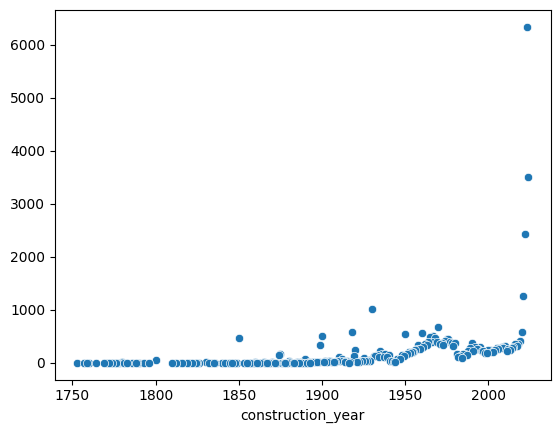

In [31]:
sns.scatterplot(df.value_counts('construction_year'));

In [32]:
# Let's check to total amount of houses:

df['construction_year'].describe()

count    42120.000000
mean      1984.406128
std         41.528851
min       1753.000000
25%       1962.000000
50%       1994.000000
75%       2022.000000
max       2024.000000
Name: construction_year, dtype: float64

In [33]:
# Let's now do a bit of manual search to find where about the mean is (so 21060 houses):

df.value_counts('construction_year').sort_index().tail(30).sum()

20818

We can see that the absolute majority of the houses is recent to new. If we do look for the mean though, the age is around 30 year.
Let's agree and put the construction year on 2002.

In [34]:
df['construction_year'].fillna(2002, inplace=True)
df

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217171,4.379982,...,5.0,0,0.0,0,0,MISSING,231.0,C,GAS,1
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174946,3.845248,...,0.0,0,0.0,0,0,MISSING,221.0,C,MISSING,1
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842045,4.334543,...,NaN,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0.0,0,0.0,0,1,MISSING,99.0,A,MISSING,0
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,20.0,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,30785000,210000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Tournai,7640,NaN,NaN,...,7.0,0,0.0,0,1,AS_NEW,NaN,MISSING,MISSING,1
75507,13524000,780000.0,APARTMENT,PENTHOUSE,Brussels-Capital,Brussels,Brussels,1200,50.840183,4.435570,...,12.0,0,0.0,0,0,AS_NEW,95.0,B,GAS,1
75508,43812000,798000.0,HOUSE,MIXED_USE_BUILDING,Brussels-Capital,Brussels,Brussels,1080,NaN,NaN,...,53.0,0,0.0,0,1,TO_RENOVATE,351.0,G,GAS,0
75509,49707000,575000.0,HOUSE,VILLA,Flanders,West Flanders,Veurne,8670,NaN,NaN,...,30.0,1,NaN,0,1,AS_NEW,269.0,C,GAS,1


Next we have some values we won't use, so can get deleted:

primary_energy_consumption_sqm, nbr_frontages, latitute and longitude

In [35]:
df = df.drop('primary_energy_consumption_sqm', axis='columns')
df = df.drop('nbr_frontages', axis='columns')
df = df.drop('latitude', axis='columns')
df = df.drop('longitude', axis='columns')

##### All surface areas

For the surface areas, we'll go for the mean:

In [36]:
df['terrace_sqm'].fillna(df['terrace_sqm'].mean(), inplace=True)
df['total_area_sqm'].fillna(df['total_area_sqm'].mean(), inplace=True)
df['garden_sqm'].fillna(df['garden_sqm'].mean(), inplace=True)

In [37]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

id                   0.0
fl_furnished         0.0
heating_type         0.0
epc                  0.0
state_building       0.0
fl_floodzone         0.0
fl_swimming_pool     0.0
garden_sqm           0.0
fl_garden            0.0
terrace_sqm          0.0
fl_terrace           0.0
fl_open_fire         0.0
equipped_kitchen     0.0
price                0.0
nbr_bedrooms         0.0
surface_land_sqm     0.0
total_area_sqm       0.0
construction_year    0.0
zip_code             0.0
locality             0.0
province             0.0
region               0.0
subproperty_type     0.0
property_type        0.0
fl_double_glazing    0.0
dtype: float64

And that leaves us with all N/As filled!

### Removing columns

As the column ID brings no extra value, we will remove this.
Also, as the EPC has different standards in different parts of Belgium, it makes no sense to keep this.

In [38]:
df = df.drop('id', axis=1)
df = df.drop('epc', axis=1)
df

,price,property_type,subproperty_type,region,province,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,...,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,heating_type,fl_double_glazing
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,1963.0,100.000000,1157.087524,...,0,1,5.000000,0,0.000000,0,0,MISSING,GAS,1
1,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,2002.0,163.670746,680.000000,...,0,0,0.000000,0,0.000000,0,0,MISSING,MISSING,1
2,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,2002.0,142.000000,1157.087524,...,0,1,11.577384,0,0.000000,0,1,AS_NEW,GAS,0
3,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,2024.0,187.000000,505.000000,...,0,0,0.000000,0,0.000000,0,1,MISSING,MISSING,0
4,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,2022.0,169.000000,1157.087524,...,0,1,20.000000,1,142.000000,0,0,AS_NEW,GAS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,210000.0,APARTMENT,APARTMENT,Wallonia,Hainaut,Tournai,7640,2023.0,73.000000,1157.087524,...,0,1,7.000000,0,0.000000,0,1,AS_NEW,MISSING,1
75507,780000.0,APARTMENT,PENTHOUSE,Brussels-Capital,Brussels,Brussels,1200,2002.0,141.000000,1157.087524,...,0,1,12.000000,0,0.000000,0,0,AS_NEW,GAS,1
75508,798000.0,HOUSE,MIXED_USE_BUILDING,Brussels-Capital,Brussels,Brussels,1080,2002.0,400.000000,390.000000,...,0,1,53.000000,0,0.000000,0,1,TO_RENOVATE,GAS,0
75509,575000.0,HOUSE,VILLA,Flanders,West Flanders,Veurne,8670,1990.0,190.000000,641.000000,...,0,1,30.000000,1,115.640289,0,1,AS_NEW,GAS,1


## Split the data

In [39]:
X = df.drop('price', axis='columns')
y = df['price']

## Data Encoding

Let's check the colums again and see how we can improve the readability:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75511 entries, 0 to 75510
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              75511 non-null  float32
 1   property_type      75511 non-null  object 
 2   subproperty_type   75511 non-null  object 
 3   region             75511 non-null  object 
 4   province           75511 non-null  object 
 5   locality           75511 non-null  object 
 6   zip_code           75511 non-null  int16  
 7   construction_year  75511 non-null  float32
 8   total_area_sqm     75511 non-null  float32
 9   surface_land_sqm   75511 non-null  float32
 10  nbr_bedrooms       75511 non-null  float32
 11  equipped_kitchen   75511 non-null  object 
 12  fl_furnished       75511 non-null  int16  
 13  fl_open_fire       75511 non-null  int16  
 14  fl_terrace         75511 non-null  int16  
 15  terrace_sqm        75511 non-null  float32
 16  fl_garden          755

Let's use the following encoders:
* One Hot Encoder
  - property type
  - subproperty type
  - region
  - province
  - heating type

* Ordinal Encoder
  - state building

* Label Encoder
  - zip code
  - locality

### One Hot Encoding

Let's start with one hot encoding:

In [41]:
object_cols = ['property_type', 'subproperty_type', 'region', 'province', 'heating_type']
new_dataset = X


OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

df_final.head(1)

/home/wouter/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,...,province_Walloon Brabant,province_West Flanders,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_MISSING,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,Antwerp,2050,1963.0,100.0,1157.087524,2.0,INSTALLED,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Ordinal encoder

Let's first look to the different options:

In [42]:
df_final['state_building'].unique()

array(['MISSING', 'AS_NEW', 'GOOD', 'TO_RENOVATE', 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [43]:
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["AS_NEW", "JUST_RENOVATED", "GOOD", "TO_BE_DONE_UP", "TO_RENOVATE", "TO_RESTORE", "MISSING"]])

# Fit it
ordinal_encoder.fit(df_final[["state_building"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_final["state_building"] = ordinal_encoder.transform(df_final[["state_building"]])

# Showing the transformed classes
df_final.head(1)

[array(['AS_NEW', 'JUST_RENOVATED', 'GOOD', 'TO_BE_DONE_UP', 'TO_RENOVATE',
        'TO_RESTORE', 'MISSING'], dtype=object)]

,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,...,province_Walloon Brabant,province_West Flanders,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_MISSING,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,Antwerp,2050,1963.0,100.0,1157.087524,2.0,INSTALLED,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Next: kitchen

In [44]:
df_final['equipped_kitchen'].unique()

array(['INSTALLED', 'MISSING', 'HYPER_EQUIPPED', 'NOT_INSTALLED',
       'USA_UNINSTALLED', 'USA_HYPER_EQUIPPED', 'SEMI_EQUIPPED',
       'USA_INSTALLED', 'USA_SEMI_EQUIPPED'], dtype=object)

In [45]:
# Instantiate the Ordinal Encoder
ordinal_encoder = OrdinalEncoder(categories = [["USA_HYPER_EQUIPPED", "HYPER_EQUIPPED", "USA_SEMI_EQUIPPED", "SEMI_EQUIPPED", "USA_INSTALLED", "INSTALLED", "USA_UNINSTALLED", "NOT_INSTALLED", "MISSING"]])

# Fit it
ordinal_encoder.fit(df_final[["equipped_kitchen"]])

# Display the learned categories
display(ordinal_encoder.categories_)

# Transforming categories into ordered numbers
df_final["equipped_kitchen"] = ordinal_encoder.transform(df_final[["equipped_kitchen"]])

# Showing the transformed classes
df_final.head(1)

[array(['USA_HYPER_EQUIPPED', 'HYPER_EQUIPPED', 'USA_SEMI_EQUIPPED',
        'SEMI_EQUIPPED', 'USA_INSTALLED', 'INSTALLED', 'USA_UNINSTALLED',
        'NOT_INSTALLED', 'MISSING'], dtype=object)]

,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,...,province_Walloon Brabant,province_West Flanders,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_MISSING,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,Antwerp,2050,1963.0,100.0,1157.087524,2.0,5.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Label Encoder

In [46]:
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
df_final['zip_code']= label_encoder.fit_transform(df_final['zip_code'])
df_final['locality']= label_encoder.fit_transform(df_final['locality'])

# Showing the transformed classes
df_final.head(1)

,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,...,province_Walloon Brabant,province_West Flanders,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_MISSING,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,1,132,1963.0,100.0,1157.087524,2.0,5.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Normalization

In [47]:
X = pd.DataFrame(MinMaxScaler().fit_transform(df_final))

In [48]:
X.columns = df_final.columns
X

,locality,zip_code,construction_year,total_area_sqm,surface_land_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,...,province_Walloon Brabant,province_West Flanders,heating_type_CARBON,heating_type_ELECTRIC,heating_type_FUELOIL,heating_type_GAS,heating_type_MISSING,heating_type_PELLET,heating_type_SOLAR,heating_type_WOOD
0,0.023256,0.122791,0.774908,0.001101,0.001217,0.010,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.279070,0.925581,0.918819,0.001823,0.000715,0.010,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.139535,0.005581,0.918819,0.001577,0.001217,0.015,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.906977,0.144186,1.000000,0.002088,0.000531,0.015,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.651163,0.042791,0.992620,0.001883,0.001217,0.010,0.125,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75506,0.883721,0.763721,0.996310,0.000794,0.001217,0.005,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75507,0.139535,0.018605,0.918819,0.001566,0.001217,0.015,0.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75508,0.139535,0.006512,0.918819,0.004504,0.000410,0.045,1.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75509,0.953488,0.866047,0.874539,0.002122,0.000674,0.020,0.625,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Split in train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [ ]:
model = XGBRegressor(max_depth=4, min_child_weight=2, n_estimators=160)

In [151]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=160, n_jobs=5,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [152]:
XGBoostscore = model.score(X_test, y_test)
print("Model XG Boost:", XGBoostscore)


Model XG Boost: 0.7387530565514333


max_depth = 6 -> 68,8%

max_depth = 4 -> 72,4%

min_child_rate = 2 -> 72,6%

n_estimators = 160 -> 73,8%

In [153]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

KeyboardInterrupt: 